# Dominik Szot
Laboratorium 09 <br>
Równania różniczkowe zwyczajne

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as scp
import scipy.integrate as integrate
import matplotlib.ticker
import sympy
from scipy.optimize import fsolve

<b>Zadanie 1</b> <br>
Przedstaw każde z poniższych równań różniczkowych zwyczajnych
jako równoważny układ równań pierwszego rzędu (ang. first-order system of
ODEs):

* <b>równanie Van der Pol'a: </b> <br>
$ y'' = y'(1-y^2) - y $ <br>

$$
\left\{
\begin{matrix}
y_{1} = y' 
\\
y_{1}' = y_{1}(1-y^2) - y
\end{matrix}\right.
$$

* <b>równanie Blasiusa: </b> <br>
$ y''' = -yy'' $ <br>

$$
\left\{\begin{matrix}
 y_1 = y \\
 y_2 = y_1' \\
 y_3' = -y_1y_2'
\end{matrix}\right.
$$

* <b>II zasada dynamiki Newtona dla problemu dwóch ciał:</b> <br>
$ y_1'' = -GM_{y1}/(y_{1}^2 + y_{2}^2)^{3/2} $ <br>
$ y_2'' = -GM_{y2}/(y_{1}^2 + y_{2}^2)^{3/2} $ <br>

$$
\left\{\begin{matrix}
 y_3 = y_1' \\
 y_4 = y_2' \\
 y_3' = -GMy_1/(y_1^2 + y_2^2)^{3/2} \\
 y_4' = -GMy_2/(y_1^2 + y_2^2)^{3/2}
\end{matrix}\right.
$$

<b>Zadanie 2.</b> Dane jest równanie różniczkowe zwyczajne 
$ y_1 = -5y $
z warunkiem początkowym $ y(0) = 1 $. Równanie rozwiązujemy numerycznie z
krokiem $ h = 0.5 $

* <b> Czy rozwiązania powyższego równania są stabilne? </b> <br>
<b> Stabilność w sensie Lapundowa </b> <br>

&emsp;&emsp; Rozwiązanie $ y(t) $ jest stabilne w sensie Lapunowa, jeśli dla dowolnego  $ \epsilon > 0 $ istnieje $ \delta > 0 $, że każde <br>
&emsp;&emsp; rozwiązanie $ x(t) $ tego równania, gdy warunki początkowe spełniają nierówność

$$ || x(t_0) - y(t_0) ||  < \delta $$
&emsp;&emsp; to 
$$ ||x(t) - y(t)|| < \epsilon , t \ge t_0 $$

&emsp;&emsp;<br><br>&emsp;&emsp; Równanie o zmiennych rozdzielonych, którego rozwiązaniem jest 
$$ y(t)=e^{-5t} $$


&emsp;&emsp;Dla dowolnego $ \epsilon > 0 $ szukamy $ \delta > 0 $, że prawdziwa będzie implikacja 
$$ | 1 - 0 | < \delta => |e^{-5t} - 0| < \epsilon $$

$$ 1 < \delta => |e^{-5t} - 0| < \epsilon $$
&emsp;&emsp;Ponieważ, <br>
$$ 1 \ge e^{-5t} , t \ge 0$$ 
&emsp;&emsp;więc dla $ \epsilon = \delta $ implikacja jest prawdziwa => rozwiązanie jest stabilne w sensie Lapundowa.


* <b> Czy metoda Euler'a jest stabilna dla tego równania z użytym krokiem h? </b><br>
$$ 
Algorytm:\\
u^{n+1} = u^n - f(u^n,t^n)\cdot \Delta t \\$$ 

&emsp;&emsp;Rejon bezwzględnej stabilności: 

$$ 
|{1 - \Delta t \cdot \lambda } | \le 1
$$

$$ 
|1 - 0.5 \cdot (-5)| \nless 1
$$

&emsp;&emsp;Warunek nie jest spełniony, więc metoda nie jest stabilna dla tego równania z użytym krokiem h



* <b> Oblicz numerycznie wartości przybliżonego rozwiązania dla t = 0.5 metodą
Euler’a.</b><br>


In [190]:
f_01 = lambda y, t : -5*y
f_01_actual = lambda t : np.e**(-5*t)

def euler_method(y_0, x_0, h, t, f):
    y = y_0
    for _ in range(int(t//h)):
        y = y + h * f(y, t)

    return y

print(f"Numeryczna wartość obliczona metodą Euler'a: {euler_method(1,0, 0.5, 0.5, f_01)}")
print(f"Wartość prawidłowa: {f_01_actual(0.5)}")


Numeryczna wartość obliczona metodą Euler'a: -1.5
Wartość prawidłowa: 0.0820849986238988


* <b> Wyjaśnij, czy niejawna metoda Euler’a jest stabilna dla tego równania z
użytym krokiem h?
</b><br>


$$ 
Algorytm:\\
u^{n} = u^{n-1} + f(u^n,t^n) \cdot {\Delta t}   $$ 

&emsp;&emsp;Rejon bezwzględnej stabilności: 

$$ 
| \frac {1} {1 - \Delta t \cdot \lambda } | \le 1
$$


$$ 
| \frac {1} {1 - 0.5 \cdot (-5)}| < 1
$$

&emsp;&emsp;Warunek jest spełniony, więc wyniki pozostaną skończone dla $ n \mapsto \infty  $

In [191]:
f_01 = lambda y, t : -5*y
f_01_actual = lambda t : np.e**(-5*t)

def euler_method_implicit(y_0, x_0, h, t, f):
    y = y_0
    for _ in range(int(t//h)):
        y = y/(1 - f(y, t)*h)

    return y

print(f"Numeryczna wartość obliczona metodą Euler'a: {euler_method_implicit(1, 0, 0.5, 0.5, f_01)}")
print(f"Wartość prawidłowa: {f_01_actual(0.5)}")


Numeryczna wartość obliczona metodą Euler'a: 0.2857142857142857
Wartość prawidłowa: 0.0820849986238988


<b>Zadanie 3.</b> Rozwiąż układ równań  <br>
$$ x'' = - GMx/r^3  $$ 
$$ y'' = - GMy/r^3  $$
dla $ GM = 1 $, $ r = (x^2 + y^2)^{1/2} $

* <b> używająć jawnej metody Eulera </b><br>
$$ y_{k+1} = y_k + h_kf'(t_k, y_k) $$


In [192]:
r_0 = [1, 0]
v_0 = [0, 1]

t_span = (0, 6*np.pi)
dt = 0.005

u_0 = [r_0[0], r_0[1], v_0[0], v_0[1]]

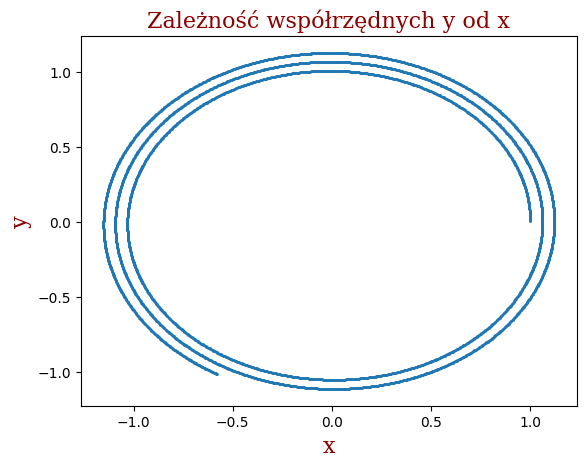

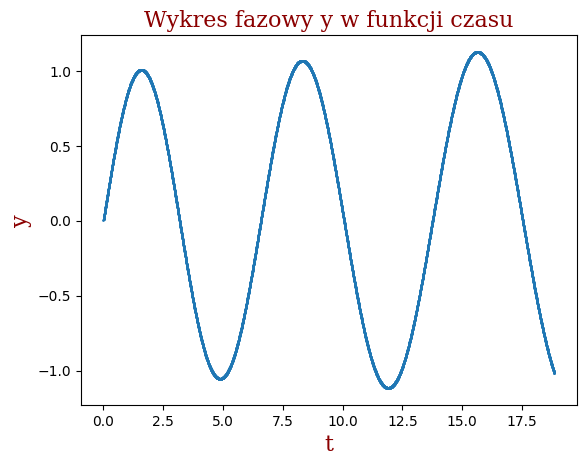

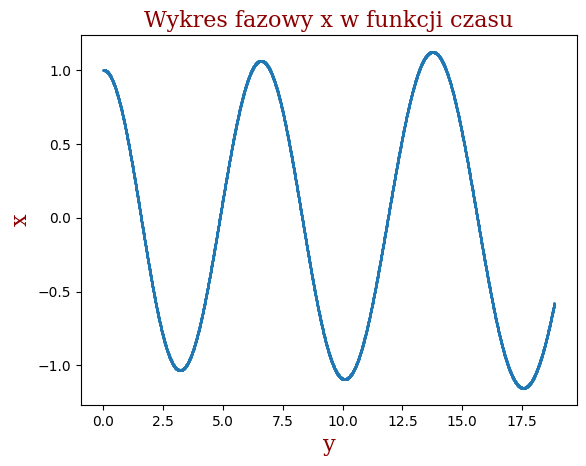

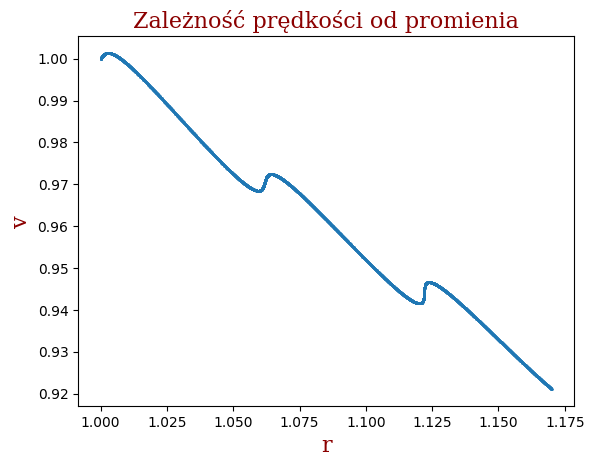

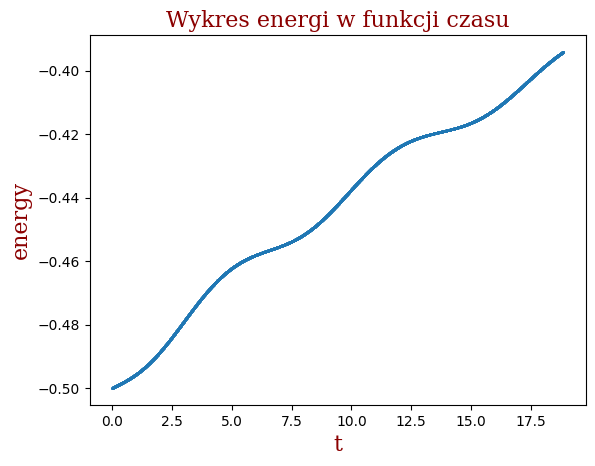

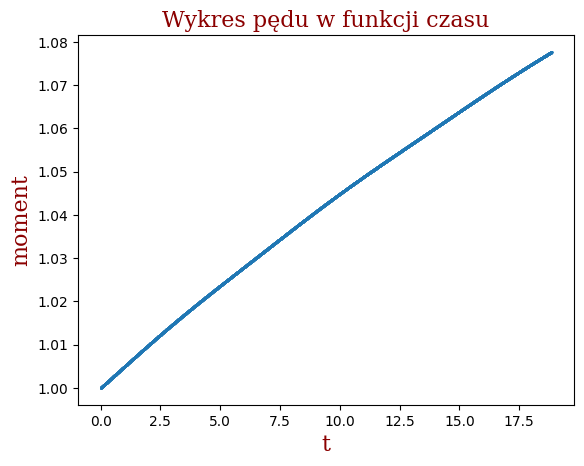

In [193]:
def euler(u_0, dt, steps):

    def calculate_step(u):
        r, v = u[0:2], u[2:4]
        norm =  np.linalg.norm(u[0:2]) ** 3
        return np.array([v[0], v[1], -r[0]/norm, -r[1]/norm])

    t0, t1 = steps
    uvals = []
    tvals = []
    u = u_0
    
    while t0 < t1:
        u += np.multiply(calculate_step(u),dt)
        t0 += dt

        uvals.append(u.copy())
        tvals.append(t0)

    return np.array(uvals), tvals

u, t = euler(u_0, dt, t_span)
x, y, u, v = np.array_split(u, 4, axis=1)

vel = np.sqrt(u**2 + v**2)
r = np.sqrt(x**2 + y**2)

energy = vel/2 - 1/r
momentum = x*v - y*u


font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

plt.scatter(x,y, s=1)
plt.title("Zależność współrzędnych y od x", fontdict=font)
plt.xlabel("x", fontdict=font)
plt.ylabel("y", fontdict=font)
plt.show()

plt.scatter(t,y, s=1)
plt.title("Wykres fazowy y w funkcji czasu", fontdict=font)
plt.xlabel("t", fontdict=font)
plt.ylabel("y", fontdict=font)
plt.show()

plt.scatter(t,x, s=1)
plt.title("Wykres fazowy x w funkcji czasu", fontdict=font)
plt.xlabel("y", fontdict=font)
plt.ylabel("x", fontdict=font)
plt.show()

plt.scatter(r,vel, s=1)
plt.title("Zależność prędkości od promienia", fontdict=font)
plt.xlabel("r", fontdict=font)
plt.ylabel("v", fontdict=font)
plt.show()

plt.scatter(t,energy, s=1)
plt.title("Wykres energi w funkcji czasu", fontdict=font)
plt.xlabel("t", fontdict=font)
plt.ylabel("energy", fontdict=font)
plt.show()

plt.scatter(t,momentum, s=1)
plt.title("Wykres pędu w funkcji czasu", fontdict=font)
plt.xlabel("t", fontdict=font)
plt.ylabel("moment", fontdict=font)
plt.show()

/home/dominiq/anaconda3/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


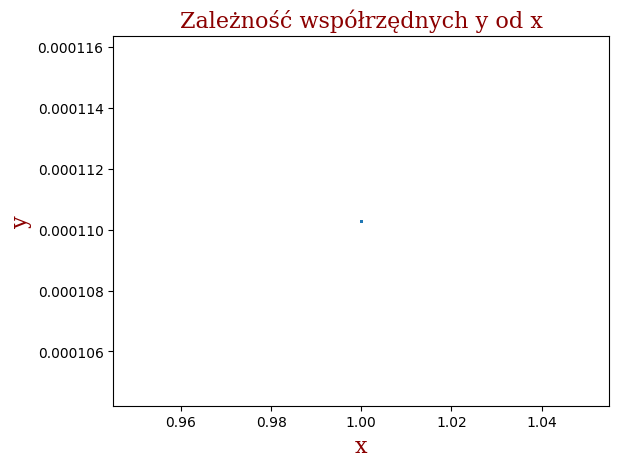

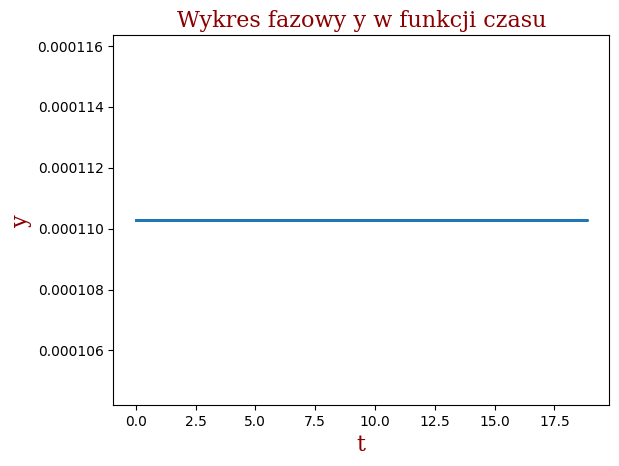

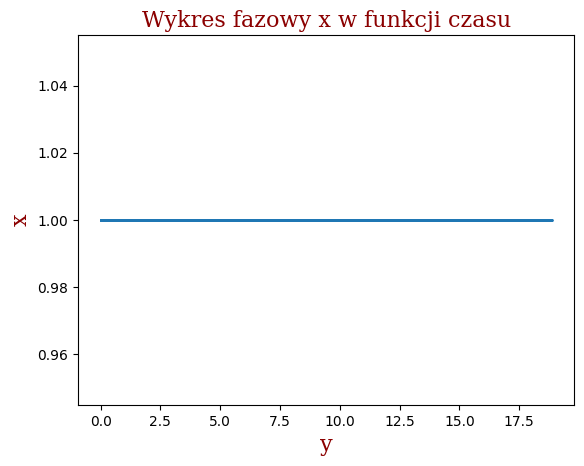

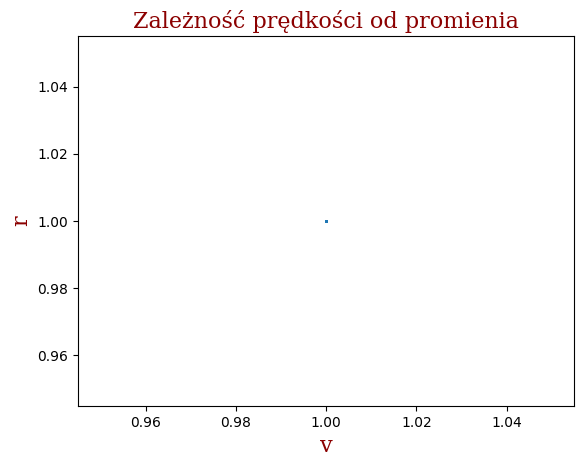

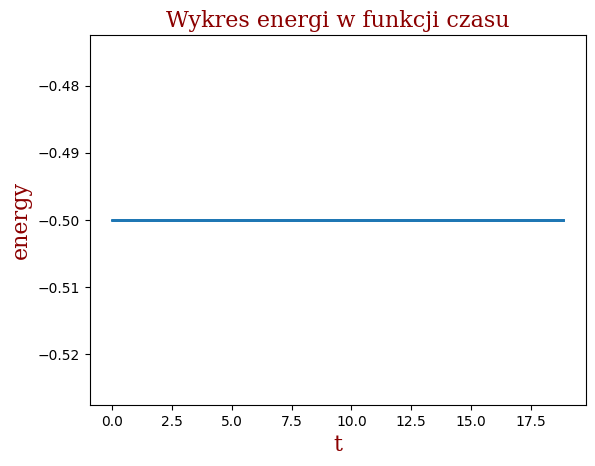

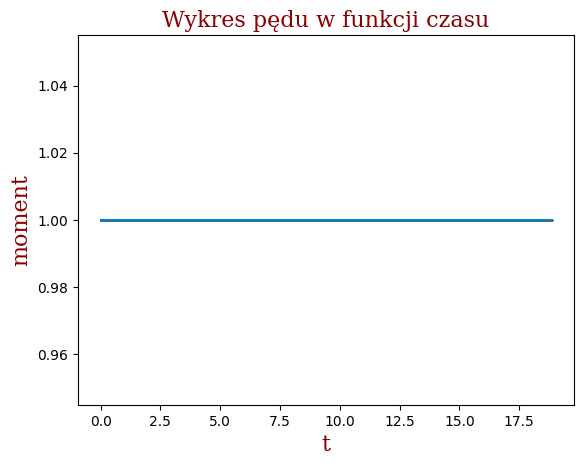

In [200]:
import copy

def euler_imp(u_0, dt, steps):
    t0, t1 = steps
    uvals = []
    tvals = []
    u = u_0
    
    def function(u,h):
        x1,y1,x2,y2 = u[0]
        px1, py1, px2, py2 = u[1]
        norm = np.linalg.norm(u[0:2])

        return [
            x1 - px1 - h * x2,
            y1 - py1 - h * y2,
            x2 - px2 + h * x1/(norm**3),
            y2 - py2 + h * y1/(norm**3),
        ]

    while t0 < t1:
        u_tmp = u.copy()
        u = fsolve(function, u, args=(u_tmp, dt))
        # u[0] += dt*u[2]
        # u[1] += dt*u[3]
        # r = np.linalg.norm(u[0:2])
        # u[2] -= dt*u[0]/r**3
        # u[3] -= dt*u[1]/r**3

        uvals.append(u.copy())
        t0 += dt
        tvals.append(t0)

    return np.array(uvals), tvals


u, t = euler_imp(u_0, dt, t_span)
x, y, u, v = np.array_split(u, 4, axis=1)

vel = np.sqrt(u**2 + v**2)
r = np.sqrt(x**2 + y**2)

energy = vel/2 - 1/r
momentum = x*v - y*u


font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

plt.scatter(x,y, s=1)
plt.title("Zależność współrzędnych y od x", fontdict=font)
plt.xlabel("x", fontdict=font)
plt.ylabel("y", fontdict=font)
plt.show()

plt.scatter(t,y, s=1)
plt.title("Wykres fazowy y w funkcji czasu", fontdict=font)
plt.xlabel("t", fontdict=font)
plt.ylabel("y", fontdict=font)
plt.show()

plt.scatter(t,x, s=1)
plt.title("Wykres fazowy x w funkcji czasu", fontdict=font)
plt.xlabel("y", fontdict=font)
plt.ylabel("x", fontdict=font)
plt.show()

plt.scatter(r,vel, s=1)
plt.title("Zależność prędkości od promienia", fontdict=font)
plt.xlabel("v", fontdict=font)
plt.ylabel("r", fontdict=font)
plt.show()

plt.scatter(t,energy, s=1)
plt.title("Wykres energi w funkcji czasu", fontdict=font)
plt.xlabel("t", fontdict=font)
plt.ylabel("energy", fontdict=font)
plt.show()

plt.scatter(t,momentum, s=1)
plt.title("Wykres pędu w funkcji czasu", fontdict=font)
plt.xlabel("t", fontdict=font)
plt.ylabel("moment", fontdict=font)
plt.show()

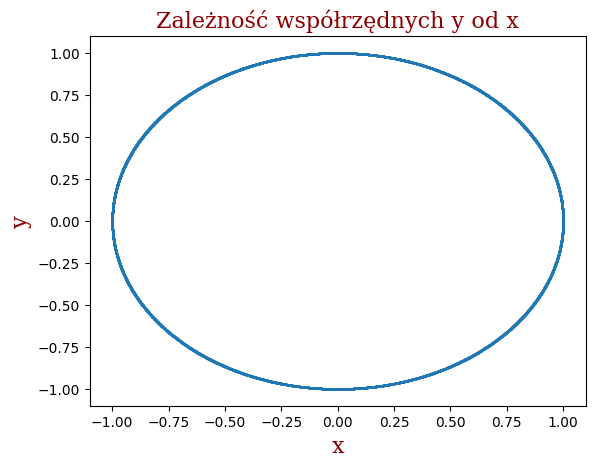

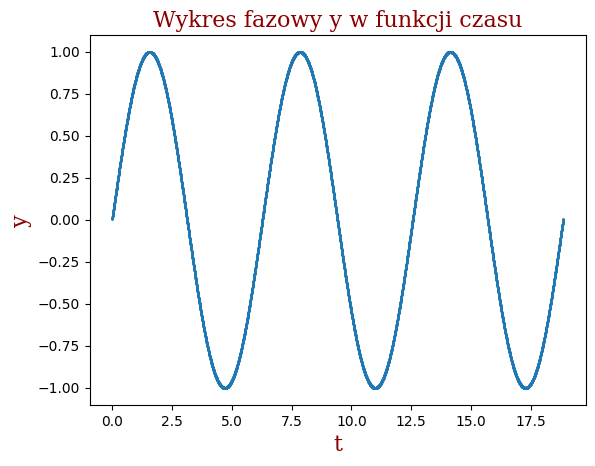

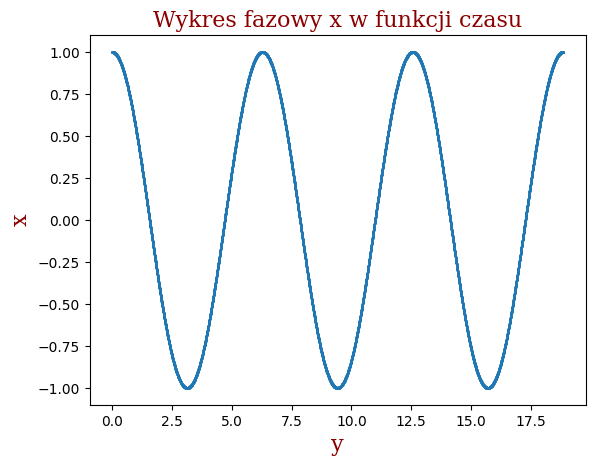

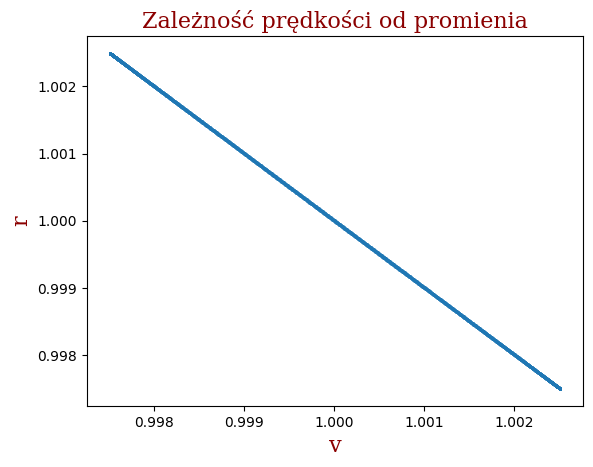

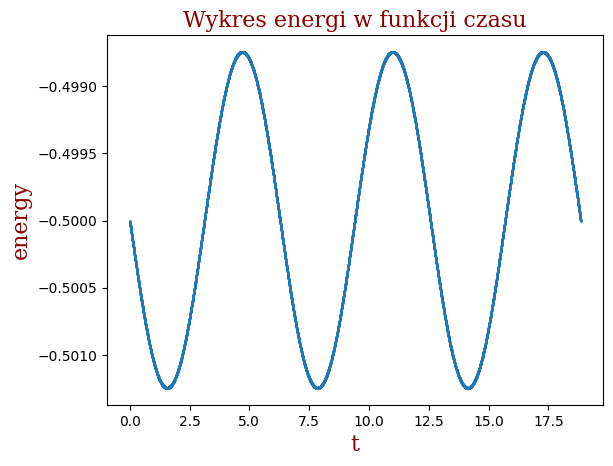

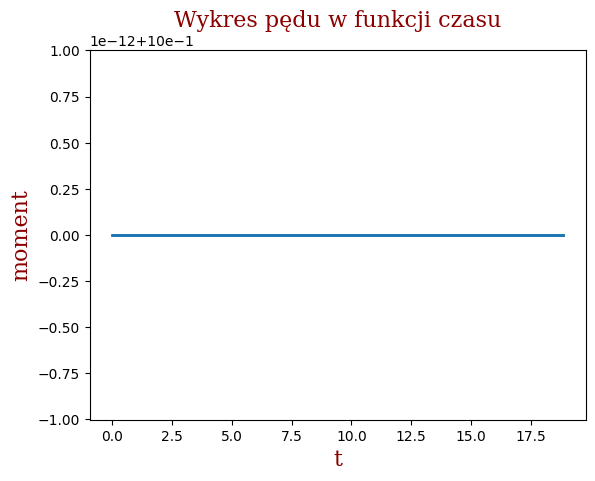

In [195]:
def euler_3(u_0, dt, steps):
    t0, t1 = steps
    uvals = []
    tvals = []

    u = u_0
    
    while t0 < t1:
        r = np.linalg.norm([u[0:2]])

        u[2] -= dt*u[0]/r**3
        u[3] -= dt*u[1]/r**3
        u[0] += dt*u[2]
        u[1] += dt*u[3]
        
        uvals.append(u.copy())
        t0 += dt
        tvals.append(t0)

    return np.array(uvals), tvals

u, t = euler_3(u_0, dt, t_span)
x, y, u, v = np.array_split(u, 4, axis=1)

vel = np.sqrt(u**2 + v**2)
r = np.sqrt(x**2 + y**2)

energy = vel/2 - 1/r
momentum = x*v - y*u


font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

plt.scatter(x,y, s=1)
plt.title("Zależność współrzędnych y od x", fontdict=font)
plt.xlabel("x", fontdict=font)
plt.ylabel("y", fontdict=font)
plt.show()

plt.scatter(t,y, s=1)
plt.title("Wykres fazowy y w funkcji czasu", fontdict=font)
plt.xlabel("t", fontdict=font)
plt.ylabel("y", fontdict=font)
plt.show()

plt.scatter(t,x, s=1)
plt.title("Wykres fazowy x w funkcji czasu", fontdict=font)
plt.xlabel("y", fontdict=font)
plt.ylabel("x", fontdict=font)
plt.show()

plt.scatter(r,vel, s=1)
plt.title("Zależność prędkości od promienia", fontdict=font)
plt.xlabel("v", fontdict=font)
plt.ylabel("r", fontdict=font)
plt.show()

plt.scatter(t,energy, s=1)
plt.title("Wykres energi w funkcji czasu", fontdict=font)
plt.xlabel("t", fontdict=font)
plt.ylabel("energy", fontdict=font)
plt.show()

plt.scatter(t,momentum, s=1)
plt.title("Wykres pędu w funkcji czasu", fontdict=font)
plt.xlabel("t", fontdict=font)
plt.ylabel("moment", fontdict=font)
plt.show()

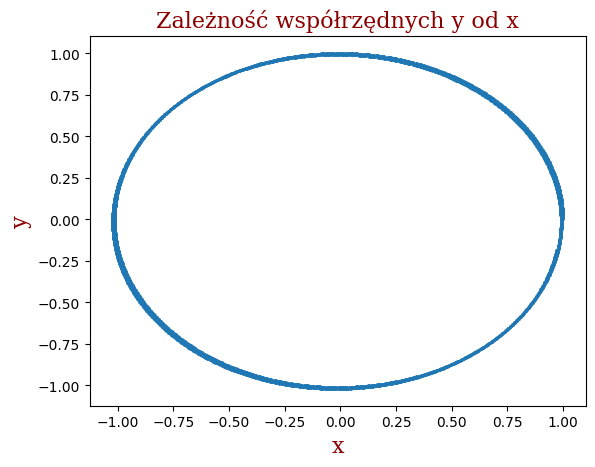

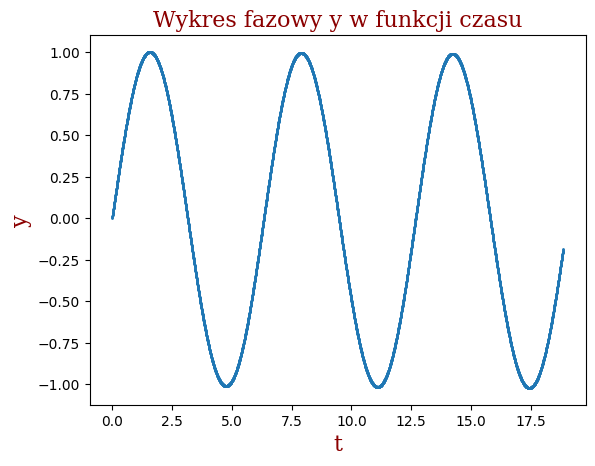

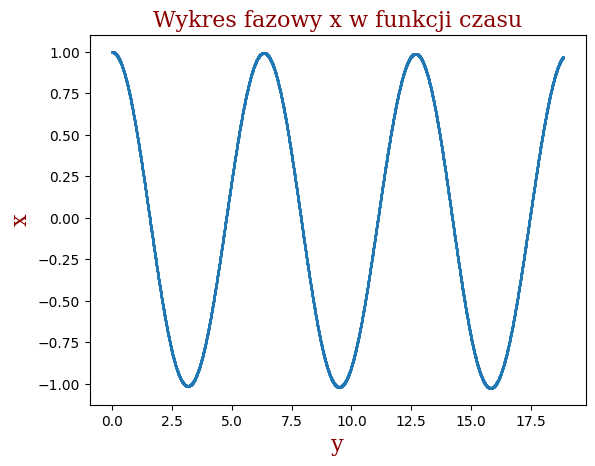

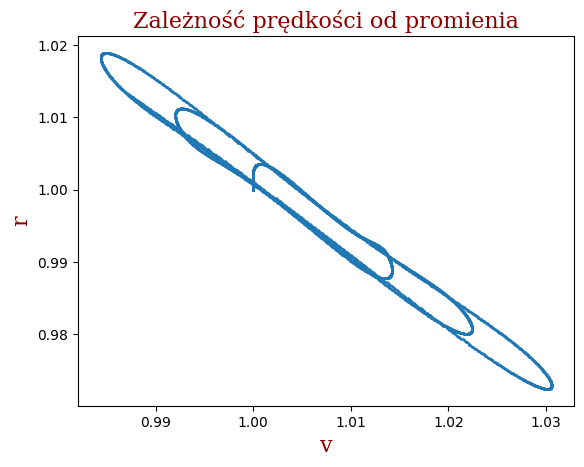

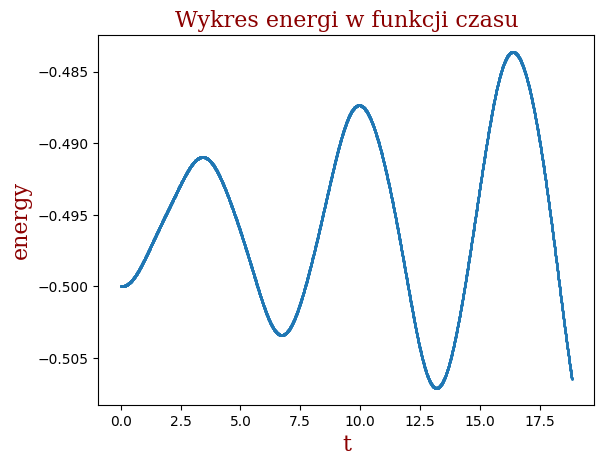

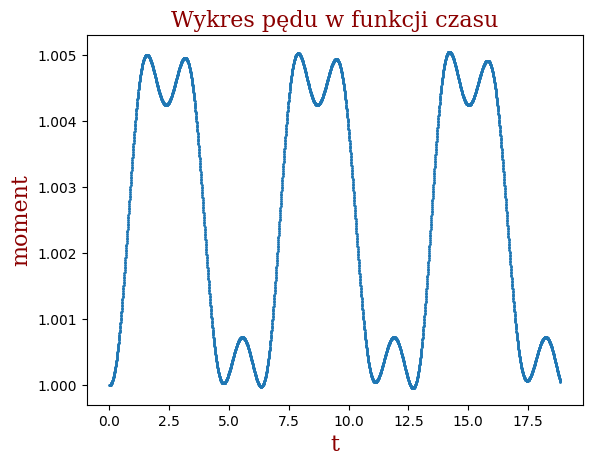

In [196]:
def runge(u_0, dt, steps):
    def helper(u, wsp, k):
        r = np.linalg.norm(u[0:2])

        return np.array([
            u[2] + wsp*k[2], 
            u[3] + wsp*k[3], 
            -(u[0] + wsp*k[0]) / (r + wsp*k[0])**3, 
            -(u[1] + wsp*k[1]) / (r + wsp*k[1])**3, 
        ])

    def calculate_step(u, dt):
        k1 = helper(u, 0, [1,1,1,1])
        k2 = helper(u, dt*0.5, k1)
        k3 = helper(u, dt*0.5, k2)
        k4 = helper(u, dt, k3)

        return np.multiply(dt, np.divide((k1 + 2*k2 + 2*k3 + k4), 6))
    
    
    t0, t1 = steps
    uvals = []
    tvals = []

    u = u_0
    
    while t0 < t1:
        u += calculate_step(u,dt)
        uvals.append(u.copy())
        t0 += dt
        tvals.append(t0)

    return np.array(uvals), tvals

u, t = runge(u_0, dt, t_span)
x, y, u, v = np.array_split(u, 4, axis=1)

vel = np.sqrt(u**2 + v**2)
r = np.sqrt(x**2 + y**2)

energy = vel/2 - 1/r
momentum = x*v - y*u


font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

plt.scatter(x,y, s=1)
plt.title("Zależność współrzędnych y od x", fontdict=font)
plt.xlabel("x", fontdict=font)
plt.ylabel("y", fontdict=font)
plt.show()

plt.scatter(t,y, s=1)
plt.title("Wykres fazowy y w funkcji czasu", fontdict=font)
plt.xlabel("t", fontdict=font)
plt.ylabel("y", fontdict=font)
plt.show()

plt.scatter(t,x, s=1)
plt.title("Wykres fazowy x w funkcji czasu", fontdict=font)
plt.xlabel("y", fontdict=font)
plt.ylabel("x", fontdict=font)
plt.show()

plt.scatter(r,vel, s=1)
plt.title("Zależność prędkości od promienia", fontdict=font)
plt.xlabel("v", fontdict=font)
plt.ylabel("r", fontdict=font)
plt.show()

plt.scatter(t,energy, s=1)
plt.title("Wykres energi w funkcji czasu", fontdict=font)
plt.xlabel("t", fontdict=font)
plt.ylabel("energy", fontdict=font)
plt.show()

plt.scatter(t,momentum, s=1)
plt.title("Wykres pędu w funkcji czasu", fontdict=font)
plt.xlabel("t", fontdict=font)
plt.ylabel("moment", fontdict=font)
plt.show()